In [1]:
!pip install pyspark
!pip install findspark

     |████████████████████████████████| 281.3 MB 36 kB/s s eta 0:00:01
     |████████████████████████████████| 198 kB 64.7 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=a5aed720d11d04dbab7a7f771b3e7bd01e3af5d492b34b61e061aff1e8e071d6
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import findspark
findspark.init

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<function findspark.init(spark_home=None, python_path=None, edit_rc=False, edit_profile=False)>

In [3]:
from pyspark.sql import SparkSession # required to created a dataframe
spark=SparkSession.builder.appName("Basics").getOrCreate() 
#spark=SparkSession.builder.appName("Basics").config("spark.executor.memory", "70g").config("spark.driver.memory", "50g").config("spark.memory.offHeap.enabled",True).config("spark.memory.offHeap.size","16g").getOrCreate() 

import pyspark.sql.functions

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/11/20 09:11:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
file = '../input/bitcoin-tweets-20160101-to-20190329/tweets.csv'
df = spark.read.csv(file, sep=";",inferSchema=True, header=True,multiLine=True)

In [6]:
df.show(10)

+-------------------+---------------+-------------------+----+--------------------+-------+-----+--------+-------------------------------------+
|                 id|           user|           fullname| url|           timestamp|replies|likes|retweets|                                 text|
+-------------------+---------------+-------------------+----+--------------------+-------+-----+--------+-------------------------------------+
|1132977055300300800|   KamdemAbdiel|      Abdiel kamdem|null|2019-05-27 11:49:...|      0|    0|       0|                 È appena uscito u...|
|1132977073402736640|      bitcointe|          Bitcointe|null|2019-05-27 11:49:...|      0|    0|       0|                 Cardano: Digitize...|
|1132977023893139456|      3eyedbran|Bran - 3 Eyed Raven|null|2019-05-27 11:49:...|      0|    2|       1|                 Another Test twee...|
|1132977089089556481|  DetroitCrypto|        J. Scardina|null|2019-05-27 11:49:...|      0|    0|       0|                 Current

In [7]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- user: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- url: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- replies: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- retweets: string (nullable = true)
 |-- text: string (nullable = true)



In [8]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import *
df = df.withColumn("id", df["id"].cast(IntegerType()))
df = df.withColumn("replies", df["replies"].cast(IntegerType()))
df = df.withColumn("likes", df["likes"].cast(IntegerType()))
df = df.withColumn("retweets", df["retweets"].cast(IntegerType()))
df = df.withColumn("timestamp",to_timestamp("timestamp"))

In [9]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- user: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- url: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- replies: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- text: string (nullable = true)



**FAMOUS TWEETS**

In [10]:
like_sort=df.orderBy(col("likes").desc(),col("retweets").desc())

In [11]:
like_sort.select("timestamp","likes","retweets","text").show()

+-------------------+------+--------+--------------------+
|          timestamp| likes|retweets|                text|
+-------------------+------+--------+--------------------+
|2019-04-04 02:07:05|291985|   61585|The type of accid...|
|2018-01-24 17:29:19|282959|   64013|FRIENDS 2018 PLOT...|
|2018-01-16 23:02:59|138468|   34318|if you lost money...|
|2017-12-09 03:47:00|130455|   22002|Wow, if I had inv...|
|2017-12-23 23:30:42|124513|   26413|the year is 3000:...|
|2017-12-07 21:26:22|121224|   29953|Put $14.00 into b...|
|2017-12-08 16:12:31|109716|   35284|A boy asked his b...|
|2019-07-13 20:56:39|100629|    9363|two things I do n...|
|2019-11-21 01:05:22| 87776|   21015|the type of accid...|
|2019-07-12 00:15:22| 70298|   18285|I am not a fan of...|
|2017-12-23 19:42:23| 67212|   14326|bitcoin investors...|
|2019-08-10 12:36:09| 66922|  178529|I will give $11,2...|
|2017-12-07 14:21:42| 58619|  181240|Bought 1,500 bitc...|
|2019-08-17 12:43:07| 58489|  143404|I will give $10,3..

**COMMON TIME**

In [12]:
common_time=df.groupBy("timestamp").count()

In [16]:
common_time.orderBy(col("count").desc()).where(col('timestamp').isNotNull()).show()

21/11/20 09:30:03 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:26 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:51 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:51 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
21/11/20 09:30:51 WARN RowBasedKeyValueBatch: Calling spill() on

+-------------------+-----+
|          timestamp|count|
+-------------------+-----+
|2019-06-04 17:41:01|  102|
|2019-06-16 08:47:01|   99|
|2019-06-29 02:01:01|   85|
|2019-06-21 08:01:00|   79|
|2019-07-19 13:05:01|   73|
|2019-07-20 16:58:00|   71|
|2019-06-04 22:24:00|   67|
|2019-06-04 00:02:01|   67|
|2019-07-15 18:20:00|   66|
|2019-06-03 14:49:00|   66|
|2019-07-13 18:18:01|   63|
|2019-07-09 16:05:00|   63|
|2019-07-05 19:50:00|   62|
|2019-06-28 07:01:00|   61|
|2019-07-08 09:00:00|   61|
|2019-06-04 22:00:00|   60|
|2019-07-02 08:48:00|   60|
|2019-06-02 13:18:01|   59|
|2019-06-29 16:12:01|   59|
|2019-07-10 01:30:00|   58|
+-------------------+-----+
only showing top 20 rows



**COMMON MONTH**

In [22]:
df1=df.withColumn('month',month("timestamp"))

In [23]:
df1.show()

+----+---------------+------------------------+----+-------------------+-------+-----+--------+-------------------------------------+-----+
|  id|           user|                fullname| url|          timestamp|replies|likes|retweets|                                 text|month|
+----+---------------+------------------------+----+-------------------+-------+-----+--------+-------------------------------------+-----+
|null|   KamdemAbdiel|           Abdiel kamdem|null|2019-05-27 11:49:14|      0|    0|       0|                 È appena uscito u...|    5|
|null|      bitcointe|               Bitcointe|null|2019-05-27 11:49:18|      0|    0|       0|                 Cardano: Digitize...|    5|
|null|      3eyedbran|     Bran - 3 Eyed Raven|null|2019-05-27 11:49:06|      0|    2|       1|                 Another Test twee...|    5|
|null|  DetroitCrypto|             J. Scardina|null|2019-05-27 11:49:22|      0|    0|       0|                 Current Crypto Pr...|    5|
|null|   mmursaleen7

In [29]:
common_month=df1.groupBy("month").count().orderBy(col("month"))
common_month.where(col('month').isNotNull()).show()

+-----+-------+
|month|  count|
+-----+-------+
|    1| 544265|
|    2| 362781|
|    3| 146755|
|    4| 404196|
|    5|1877963|
|    6|2510411|
|    7|2571423|
|    8|2345117|
|    9|2045897|
|   10|2174384|
|   11|1510884|
|   12| 391739|
+-----+-------+



<AxesSubplot:xlabel='month'>

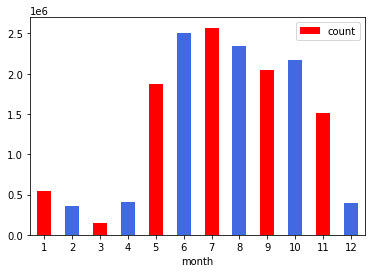

In [90]:
common_month_df =common_month.where(col('month').isNotNull()).toPandas()
common_month_df.plot.bar(x='month',y='count',color=['red','royalblue'],rot=0)

In [ ]:
#month_name=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

In [82]:
import pyspark.sql.functions as f
my_list = common_month.select(f.collect_list('month')).first()[0]

In [59]:
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [83]:
import datetime
month_name=[]
for i in my_list:
    datetime_object = datetime.datetime.strptime(str(i),"%m")
    month_name.append(datetime_object.strftime("%B"))

In [89]:
from pyspark.sql.types import StringType
month_df=spark.createDataFrame(month_name, StringType())


In [86]:
common_month.withColumn("month_name",month_df.select("value"))

TypeError: col should be Column